In [1]:
import settings
import util
import pandas as pd
import numpy as np
import seaborn as sns

from importlib import reload

SAVE_FOLDER = "pnasn/"

settings = reload(settings)
util = reload(util)

In [10]:
low_extinction = util.load_data("low-extinction.json")

In [2]:
D1_expanded = util.load_data("simulation,D=1,T=1000.json")
D1_original = util.make_original_copy(D1_expanded)

# D2 = util.load_data("simulation,D=2,T=1000.json")
# D4 = util.load_data("simulation,D=4,T=1000.json")
# TODO - return to T=1000 when it finishes
D8_expanded = util.load_data("simulation,D=8,T=1000.json", drop_control=False, D=8)
D8_original = util.make_original_copy(D8_expanded)
DIFEQ = util.load_data("difeq,D=1,T=1.json", drop_control=False)

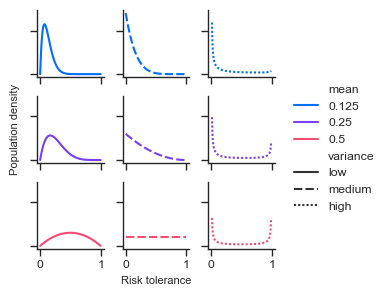

In [3]:
import figure1
figure1 = reload(figure1)

figure1.plot_1_B()

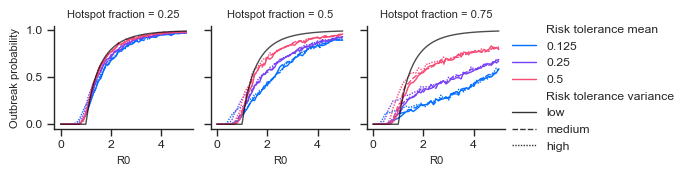

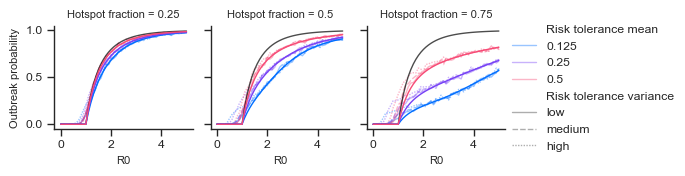

In [5]:
import figure2
import extinction


settings = reload(settings)
extinction = reload(extinction)
figure2 = reload(figure2)

figure2.plot_2_A(D1_original)
figure2.plot_2_B(D1_original, theoretical_risk_means=[0.125, 0.25, 0.5])

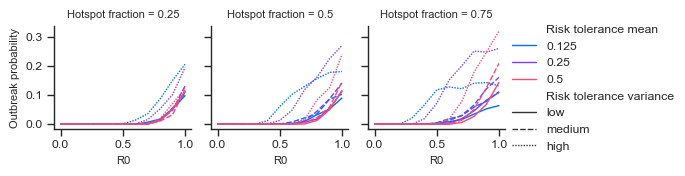

In [18]:
import figure2
import extinction


settings = reload(settings)
extinction = reload(extinction)
figure2 = reload(figure2)

figure2.base_plot(D1_original[D1_original["R0"]<=1]).savefig(
    SAVE_FOLDER + "figure2-low-R0.pdf", format="pdf", dpi=settings.DPI)

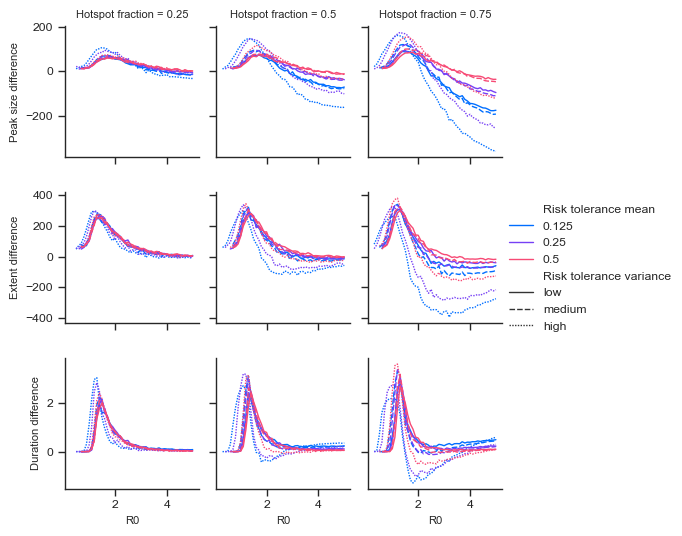

In [6]:
import figure3
figure3 = reload(figure3)

figure3.plot_3(D8_original, timing_values=["Duration"]).savefig(
    SAVE_FOLDER + "figure3-with-duration.pdf", format="pdf", dpi=settings.DPI)

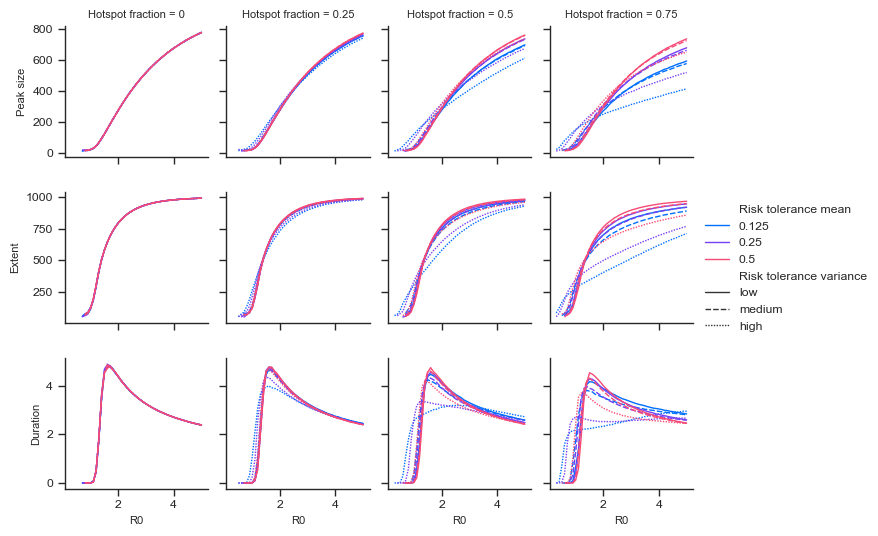

In [7]:
# Figure S1

import figure3
figure3 = reload(figure3)

figure3.plot_3(D8_original, timing_values=["Duration"], undiffed=True, set_width=False).savefig(
    SAVE_FOLDER + "figure3-undiffed.pdf", format="pdf", dpi=settings.DPI)

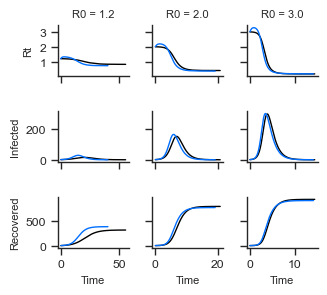

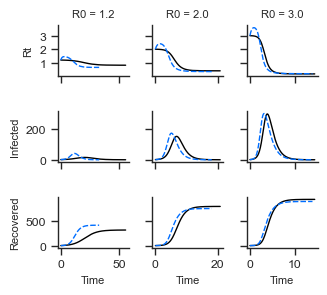

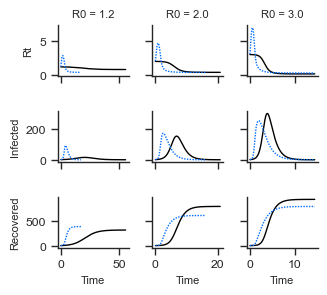

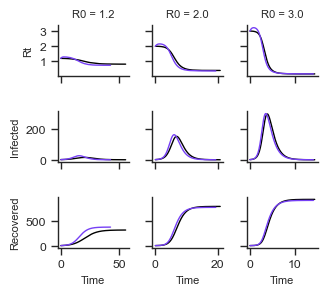

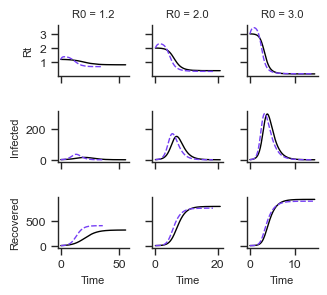

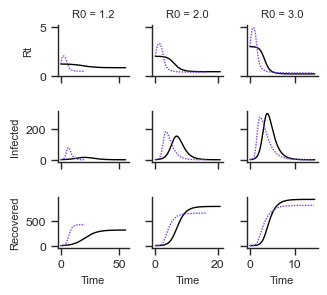

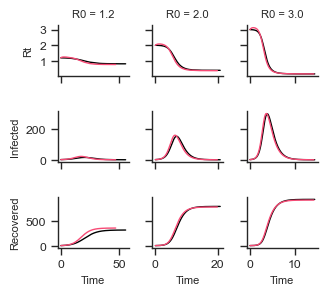

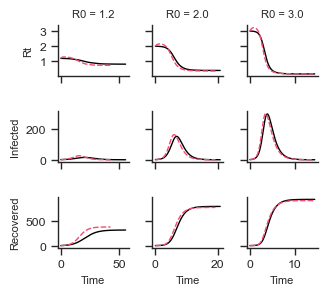

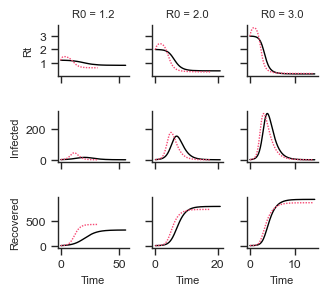

In [52]:
# Figure S2
import figure4

figure4 = reload(figure4)

for i, risk_tolerance_mean in enumerate([0.125, 0.25, 0.5]):
    for j, risk_tolerance_variance in enumerate(["low", "medium", "high"]):
        f = figure4.plot_4(
            DIFEQ,
            risk_tolerance_mean=risk_tolerance_mean,
            risk_tolerance_variance=risk_tolerance_variance,
        R0s=[1.2, 2.0, 3.0])
        f.savefig(SAVE_FOLDER + f"fig4/{risk_tolerance_mean}|{risk_tolerance_variance}.pdf", format="pdf", dpi=settings.DPI)


In [1]:
# Figure S3
import figure2
import extinction
import figureSI1


settings = reload(settings)
extinction = reload(extinction)
figure2 = reload(figure2)

settings.SAVE_FIGS = False

si1figures = {
    1: figure2.plot_2_A(D1),
    2: figure2.plot_2_A(D2),
    4: figure2.plot_2_A(D4),
    8: figure2.plot_2_A(D8),
}

for key, fig in si1figures.items():
    fig.savefig(settings.IMAGE_LOCATION + f'figureSI1D={key}.pdf', dpi=settings.DPI)

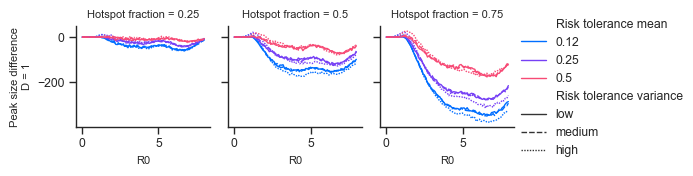

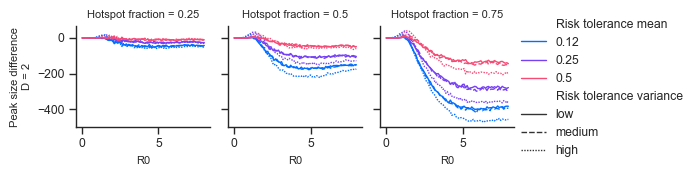

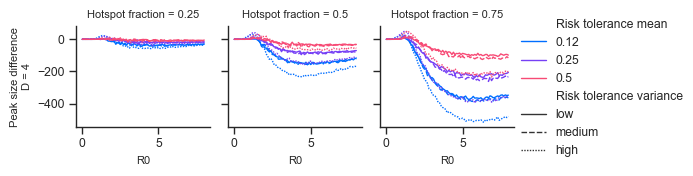

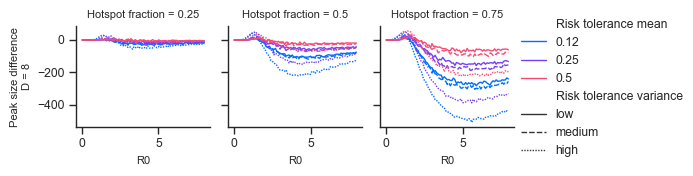

In [4]:
# Figure S4

for data, D in [(D1, 1), (D2, 2), (D4, 4), (D8, 8)]:

    outcome_plot = sns.relplot(
        data=data,
        y="Peak size difference",
        x="R0",
        kind="line",
        col="Hotspot fraction",
        errorbar=None,
        hue="Risk tolerance mean",
        style="Risk tolerance variance",
        facet_kws={"sharey":"row"},
        height=settings.HEIGHT,
        #aspect=1.0,
    )

    outcome_plot.axes[0][0].set_ylabel(f"Peak size difference\nD = {D}")
    outcome_plot.set_xlabels("$\mathregular{R_0}$")
    outcome_plot.figure.set_figwidth(settings.FULL_WIDTH)
    #outcome_plot.figure.tight_layout()

    outcome_plot.savefig(settings.IMAGE_LOCATION + f'figureS2D={D}.pdf', dpi=settings.DPI)

	#return outcome_plot



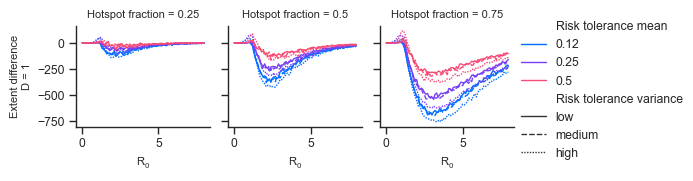

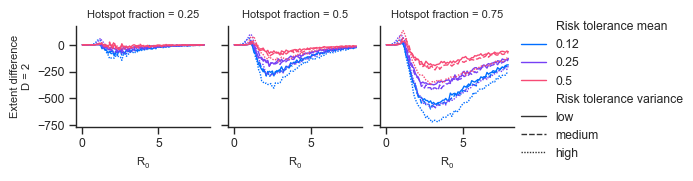

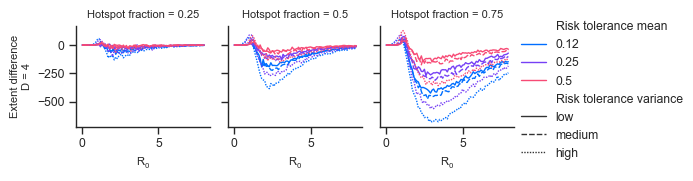

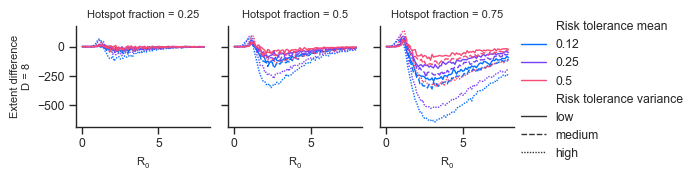

In [10]:
# Figure S5
pdfs = []
for data, D in [(D1, 1), (D2, 2), (D4, 4), (D8, 8)]:

    outcome_plot = sns.relplot(
        data=data,
        y="Extent difference",
        x="R0",
        kind="line",
        col="Hotspot fraction",
        errorbar=None,
        hue="Risk tolerance mean",
        style="Risk tolerance variance",
        facet_kws={"sharey":"row"},
        height=settings.HEIGHT,
        #aspect=1.0,
    )

    outcome_plot.axes[0][0].set_ylabel(f"Extent difference\nD = {D}")
    outcome_plot.set_xlabels(r'$\mathregular{R_0}$')
    outcome_plot.figure.set_figwidth(settings.FULL_WIDTH)
    #outcome_plot.figure.tight_layout()
    filename = settings.IMAGE_LOCATION + f'figureS3D={D}.pdf'
    outcome_plot.savefig(filename, dpi=settings.DPI)
    pdfs.append(filename)

	#return outcome_plot


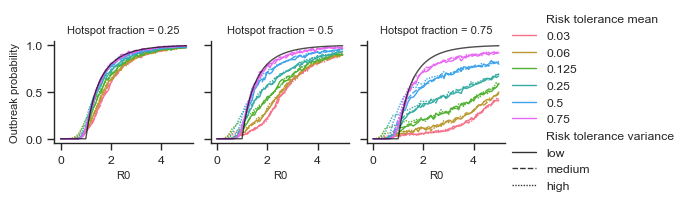

In [46]:
# Figure S6
import figure2


settings = reload(settings)
figure2 = reload(figure2)

figure2.plot_2_A(D1_expanded).savefig(
    SAVE_FOLDER + "figure2-expanded-risk-means.pdf", format="pdf", dpi=settings.DPI)

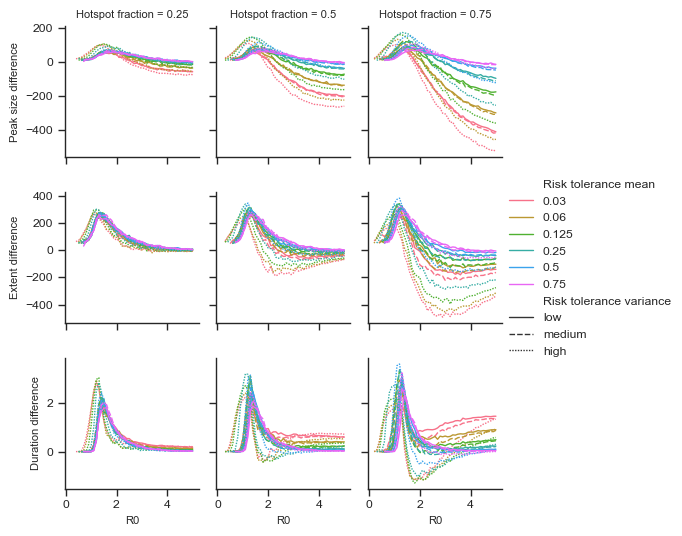

In [8]:
# Figure S7

import figure3
figure3 = reload(figure3)

figure3.plot_3(D8_expanded, timing_values=["Duration"]).savefig(
    SAVE_FOLDER + "figure3-expanded-risk-means.pdf", format="pdf", dpi=settings.DPI)

